In [235]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, clear_output

In [236]:
# Importing the dataset

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [241]:
train.Annual_Premium.max()

540165.0

In [242]:
test.Annual_Premium.max()

472042.0

In [ ]:
train[train.Annual_Premium]

In [237]:
train["Gender"]=train["Gender"].astype("category")
train["Region_Code"]=train.Region_Code.astype("int")
train.Vehicle_Age=train.Vehicle_Age.astype("category")
train.Vehicle_Damage=train.Vehicle_Damage.astype('category')
train.Policy_Sales_Channel=train.Policy_Sales_Channel.astype('int')

train.drop(columns="id",inplace=True)
train.Region_Code=train.Region_Code.astype('category')

In [238]:
test["Gender"]=train["Gender"].astype("category")
test["Region_Code"]=test.Region_Code.astype("int")
test.Vehicle_Age=test.Vehicle_Age.astype("category")
test.Vehicle_Damage=test.Vehicle_Damage.astype('category')
test.Policy_Sales_Channel=test.Policy_Sales_Channel.astype('int')

test.drop(columns="id",inplace=True)
test.Region_Code=test.Region_Code.astype('category')

In [239]:
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28,0,> 2 Years,Yes,40454.0,26,217,1
1,Male,76,1,3,0,1-2 Year,No,33536.0,26,183,0
2,Male,47,1,28,0,> 2 Years,Yes,38294.0,26,27,1
3,Male,21,1,11,1,< 1 Year,No,28619.0,152,203,0
4,Female,29,1,41,1,< 1 Year,No,27496.0,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26,1,1-2 Year,No,30170.0,26,88,0
381105,Male,30,1,37,1,< 1 Year,No,40016.0,152,131,0
381106,Male,21,1,30,1,< 1 Year,No,35118.0,160,161,0
381107,Female,68,1,14,0,> 2 Years,Yes,44617.0,124,74,0


In [240]:
train.corr()

,Age,Driving_License,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Age,1.000000,-0.079782,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.079782,1.000000,0.014969,-0.011906,0.043731,-0.000848,0.010155
Previously_Insured,-0.254682,0.014969,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.067507,-0.011906,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.577826,0.043731,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.001264,-0.000848,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,0.111147,0.010155,-0.341170,0.022575,-0.139042,-0.001050,1.000000


In [6]:
a=list(train.Policy_Sales_Channel.unique())
b=list(test.Policy_Sales_Channel.unique())

In [7]:
len(a)

155

In [8]:
len(b)

145

In [9]:
set(b).difference(set(a))

{141, 142}

In [10]:
a.extend([141, 142])

In [11]:
train["Policy_Sales_Channel"]=pd.Categorical(train["Policy_Sales_Channel"], categories=a, ordered=False)
test["Policy_Sales_Channel"]=pd.Categorical(test["Policy_Sales_Channel"], categories=a, ordered=False)

In [12]:
train=pd.get_dummies(train,drop_first=True)
test=pd.get_dummies(test,drop_first=True)

In [13]:
X_train=train.drop(columns="Response")
y_train=train["Response"]

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaler.fit(X_train)
X_train_scaled=pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)
X_test_scaled=pd.DataFrame(scaler.transform(test),columns=test.columns)

## Decision Trees

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.model_selection import cross_val_score

In [127]:
scores=cross_val_score(DecisionTreeClassifier(ccp_alpha=0.00007,class_weight='balanced',random_state=40),X_train_scaled,y_train,scoring='roc_auc',cv=5)

KeyboardInterrupt: 

In [81]:
scores.mean()

0.8497879062651826

In [26]:
for i in [0.0002,0.0001,0.00009,0.00008,0.00007,0.0006,0.0005]:
    scores=cross_val_score(DecisionTreeClassifier(ccp_alpha=i,class_weight='balanced',random_state=40),X_train_scaled,y_train,scoring='roc_auc',cv=5)
    print(scores.mean())

0.8459391095051305
0.8481951594938544
0.8486977025429605
0.8490711633612259
0.8503963286714752
0.8416258157656941
0.8425886894510827


In [129]:
tree=DecisionTreeClassifier(ccp_alpha=0.00007,class_weight='balanced',random_state=40)

In [18]:
path=tree.cost_complexity_pruning_path(X_train_scaled,y_train)

In [19]:
alphas,impurities=path.ccp_alphas,path.impurities

In [20]:
len(alphas)

20648

In [21]:
alphas.min(),alphas.max()

(0.0, 0.17681389020228394)

In [ ]:
np.arange(0.0,alphas.max(),0.)

In [ ]:
means=[]
stds=[]
for i in alphas:
    scores=cross_val_score(DecisionTreeClassifier(ccp_alpha=i,class_weight='balanced',random_state=40),X_train_scaled,y_train,scoring='roc_auc',cv=4)
    
    means.append(scores.mean())
    stds.append(scores.std())

In [130]:
tree.fit(X_train_scaled,y_train)

y_train_pred=tree.predict(X_train_scaled)
y_test_pred=tree.predict(X_test_scaled)

In [132]:
tree.get_depth()

11

In [141]:
tree.get_n_leaves()

46

In [84]:
y_train_prob=tree.predict_proba(X_train_scaled)[:,1]
y_test_prob=tree.predict_proba(X_test_scaled)[:,1]

In [85]:
pd.Series(y_test_pred).value_counts()

0    74327
1    52710
dtype: int64

In [31]:
subA=pd.DataFrame({"id":pd.read_csv("test.csv")["id"],"Response":y_test_prob})
subA.to_csv("Submission Decision Tree Weight Balanced ccp=0.00007.csv",index=False)

#### Important Features

In [61]:
len(tree.feature_importances_)

217

In [63]:
importance=pd.DataFrame({"columns":X_test_scaled.columns,"value_coeff":tree.feature_importances_})

In [67]:
importance=importance.sort_values(by="value_coeff",ascending=False)

In [74]:
#important features
impp=list(importance[abs(importance.value_coeff)>0]["columns"])
impp

['Vehicle_Damage_Yes',
 'Previously_Insured',
 'Age',
 'Policy_Sales_Channel_160',
 'Policy_Sales_Channel_152',
 'Policy_Sales_Channel_157',
 'Policy_Sales_Channel_156',
 'Vehicle_Age_> 2 Years',
 'Annual_Premium',
 'Policy_Sales_Channel_124',
 'Gender_Male',
 'Policy_Sales_Channel_151',
 'Region_Code_8',
 'Driving_License',
 'Region_Code_28',
 'Region_Code_11',
 'Region_Code_18',
 'Policy_Sales_Channel_163',
 'Policy_Sales_Channel_154',
 'Region_Code_41',
 'Region_Code_36',
 'Region_Code_15']

In [75]:
X_train_removed=X_train_scaled.drop(columns=impp)
X_test_removed=X_test_scaled.drop(columns=impp)

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.model_selection import cross_val_score

scores=cross_val_score(DecisionTreeClassifier(class_weight='balanced',random_state=40),X_train_removed,y_train,scoring='roc_auc',cv=5)

In [79]:
scores

array([0.62697536, 0.62857441, 0.62499023, 0.62642049, 0.6211417 ])

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.model_selection import cross_val_score

In [16]:
randomforest=RandomForestClassifier()

In [39]:
scores=cross_val_score(RandomForestClassifier(class_weight='balanced',n_estimators=10,n_jobs=-1,random_state=40,ccp_alpha=0.00007),X_train_scaled,y_train,scoring='roc_auc',cv=5,n_jobs=-1)

In [40]:
scores

array([0.85415911, 0.85247711, 0.85272508, 0.85133148, 0.85027445])

In [41]:
scores.mean()

0.8521934490951841

In [84]:
randomforest=RandomForestClassifier(class_weight='balanced',n_estimators=100,random_state=40,n_jobs=-1,max_features="log2",ccp_alpha=0.00007,verbose=2)
randomforest.fit(X_train_scaled,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100building tree 6 of 100building tree 7 of 100


building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100

building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.1min


building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.9min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=7e-05, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=40, verbose=2,
                       warm_start=False)

In [85]:
y_train_prob=randomforest.predict_proba(X_train_scaled)[:,1]
y_test_prob=randomforest.predict_proba(X_test_scaled)[:,1]

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.6s finished


In [86]:
y_train_pred=randomforest.predict(X_train_scaled)
y_test_pred=randomforest.predict(X_test_scaled)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.5s finished


In [87]:
roc_auc_score(y_train,y_train_prob)

0.8543545535405006

In [88]:
pd.Series(y_test_pred).value_counts()

0    75140
1    51897
dtype: int64

In [89]:
subA=pd.DataFrame({"id":pd.read_csv("test.csv")["id"],"Response":y_test_prob})
subA.to_csv("Random Forest Classifier.csv",index=False)

## Gradient Boosting

In [90]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.model_selection import cross_val_score

In [97]:
scores=cross_val_score(GradientBoostingClassifier(n_estimators=100,random_state=40,verbose=2),X_train_scaled,y_train,scoring='roc_auc',cv=5,n_jobs=-1,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed: 18.0min remaining: 12.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 18.1min finished


In [55]:
# class_weight='balanced',n_estimators=10,n_jobs=-1,random_state=40,ccp_alpha=0.00007

In [98]:
scores

array([0.84820414, 0.84621898, 0.8460401 , 0.84584687, 0.84475893])

In [99]:
scores.mean()

0.8462138042457991

In [100]:
gradientbooster=GradientBoostingClassifier(n_estimators=100,random_state=40,verbose=2)
gradientbooster.fit(X_train_scaled,y_train)

      Iter       Train Loss   Remaining Time 
         1           0.7138           17.39m
         2           0.6897           17.45m
         3           0.6703           17.42m
         4           0.6540           17.21m
         5           0.6406           16.86m
         6           0.6288           16.71m
         7           0.6185           16.55m
         8           0.6097           16.26m
         9           0.6019           16.05m
        10           0.5954           15.94m
        11           0.5896           15.81m
        12           0.5843           15.61m
        13           0.5798           15.45m
        14           0.5756           15.26m
        15           0.5718           14.98m
        16           0.5687           14.79m
        17           0.5657           14.59m
        18           0.5629           14.34m
        19           0.5607           14.14m
        20           0.5585           13.94m
        21           0.5565           13.77m
        2

GradientBoostingClassifier(ccp_alpha=7e-05, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=40, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=2,
                           warm_start=False)

In [101]:
y_train_prob=gradientbooster.predict_proba(X_train_scaled)[:,1]
y_test_prob=gradientbooster.predict_proba(X_test_scaled)[:,1]

In [102]:
y_train_pred=gradientbooster.predict(X_train_scaled)
y_test_pred=gradientbooster.predict(X_test_scaled)

In [103]:
roc_auc_score(y_train,y_train_prob)

0.8474230236928044

In [104]:
pd.Series(y_test_pred).value_counts()

0    127037
dtype: int64

In [105]:
subA=pd.DataFrame({"id":pd.read_csv("test.csv")["id"],"Response":y_test_prob})
subA.to_csv("Gradient Boosting n_estimators=100,ccp_alpha=0.00007.csv",index=False)

## Extra Trees Classifier

In [107]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.model_selection import cross_val_score

In [108]:
extratree=ExtraTreesClassifier()

In [110]:
scores=cross_val_score(ExtraTreesClassifier(class_weight='balanced',verbose=2,n_estimators=10,n_jobs=-1,random_state=40,ccp_alpha=0.00007),X_train_scaled,y_train,scoring='roc_auc',cv=5,n_jobs=-1,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  5.2min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.2min finished


In [111]:
scores

array([0.8515534 , 0.85123904, 0.85008832, 0.84948355, 0.85018599])

In [112]:
scores.mean()

0.8505100601445754

## Light GBM (Default)

In [113]:
!pip install lightgbm

In [124]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.model_selection import cross_val_score

In [116]:
scores=cross_val_score(LGBMClassifier(),X_train_scaled,y_train,scoring='roc_auc',cv=5,n_jobs=-1,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   16.9s remaining:   11.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.1s finished


In [117]:
scores

array([0.85797733, 0.85744224, 0.8556586 , 0.85659133, 0.85519808])

In [118]:
lgbm=LGBMClassifier()
lgbm.fit(X_train_scaled,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [119]:
y_train_prob=lgbm.predict_proba(X_train_scaled)[:,1]
y_test_prob=lgbm.predict_proba(X_test_scaled)[:,1]

In [120]:
y_train_pred=lgbm.predict(X_train_scaled)
y_test_pred=lgbm.predict(X_test_scaled)

In [121]:
roc_auc_score(y_train,y_train_prob)

0.8620840516798431

In [122]:
pd.Series(y_test_pred).value_counts()

0    126939
1        98
dtype: int64

In [123]:
subA=pd.DataFrame({"id":pd.read_csv("test.csv")["id"],"Response":y_test_prob})
subA.to_csv("LGBM Default.csv",index=False)

## Light GBM (Improvements)

In [125]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.model_selection import cross_val_score

In [174]:
main_df=pd.DataFrame(columns=["i","j","mean","std"])
main_df

,i,j,mean,std


In [181]:
means=[]
stds=[]

for i in range(1,50):
    for j in range(2*i,2**i+1):
        scores=cross_val_score(LGBMClassifier(boosting_type='gbdt',n_estimators=150,max_depth=i,num_leaves=j),X_train_scaled,y_train,scoring='roc_auc',cv=5,n_jobs=-1)
        means.append(scores.mean())
        stds.append(scores.std())
    
        main_df=main_df.append({"i":i,"j":j,"mean":scores.mean(),"std":scores.std()},ignore_index=True)
        display(main_df)
        clear_output()  

KeyboardInterrupt: 

In [187]:
main_df.head(100)

,i,j,mean,std
0,1.0,2.0,0.849249,0.001339
1,1.0,3.0,0.849249,0.001339
2,1.0,2.0,0.849249,0.001339
3,1.0,3.0,0.849249,0.001339
4,1.0,4.0,0.849249,0.001339
...,...,...,...,...
95,6.0,55.0,0.856538,0.000997
96,6.0,56.0,0.856667,0.000965
97,6.0,57.0,0.856540,0.001093
98,6.0,58.0,0.856542,0.001137


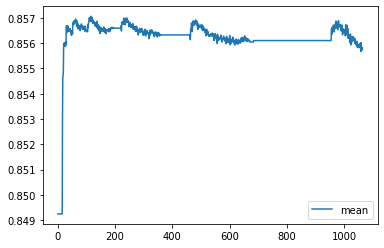

In [185]:
main_df.plot(kind='line',y="mean")

In [156]:
scores

array([0.85757269, 0.85721525, 0.85551563, 0.85684874, 0.85499941])

In [157]:
scores.mean(),scores.std()

(0.8564303429105392, 0.0009980332956926036)

In [168]:
lgbm=LGBMClassifier(class_weight='balanced')
lgbm.fit(X_train_scaled,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [169]:
y_train_prob=lgbm.predict_proba(X_train_scaled)[:,1]
y_test_prob=lgbm.predict_proba(X_test_scaled)[:,1]

In [170]:
y_train_pred=lgbm.predict(X_train_scaled)
y_test_pred=lgbm.predict(X_test_scaled)

In [171]:
roc_auc_score(y_train,y_train_prob)

0.8619066211410752

In [172]:
pd.Series(y_test_pred).value_counts()

0    75555
1    51482
dtype: int64

In [173]:
subA=pd.DataFrame({"id":pd.read_csv("test.csv")["id"],"Response":y_test_prob})
subA.to_csv("LGBM class_weight='balanced'.csv",index=False)

In [232]:
scores=cross_val_score(LGBMClassifier(boosting_type='gbdt',n_estimators=150,class_weight='balanced',objective='binary',reg_alpha=10,metric='auc'),X_train_scaled,y_train,scoring='roc_auc',cv=5,n_jobs=-1)

In [233]:
scores.mean()

0.8573569372769132

In [214]:
lgbm=LGBMClassifier(boosting_type='gbdt',n_estimators=150,class_weight='balanced',reg_alpha=10)
lgbm.fit(X_train_scaled,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=150, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=10, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [215]:
y_train_prob=lgbm.predict_proba(X_train_scaled)[:,1]
y_test_prob=lgbm.predict_proba(X_test_scaled)[:,1]

In [216]:
y_train_pred=lgbm.predict(X_train_scaled)
y_test_pred=lgbm.predict(X_test_scaled)

In [217]:
roc_auc_score(y_train,y_train_prob)

0.8629629128662178

In [218]:
pd.Series(y_test_pred).value_counts()

0    76199
1    50838
dtype: int64

In [219]:
subA=pd.DataFrame({"id":pd.read_csv("test.csv")["id"],"Response":y_test_prob})
subA.to_csv("LGBM n_estimators=150,class_weight='balanced',reg_alpha=10'.csv",index=False)